#  Analyzing Stack Overflow Trends
## 1. Importing Libraries and Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

file_path = Path("C:/Users/user/Downloads/QueryResults (1).csv")
df = pd.read_csv(file_path)
                 
df.head()


,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [2]:
df.shape

(1991, 3)

In [3]:
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

In [4]:
 df.groupby('TagName').sum()

,m,Unnamed: 2
TagName,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


In [5]:
df.groupby('TagName').count()

,m,Unnamed: 2
TagName,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [6]:
print(df.columns.tolist())

['m', 'TagName', 'Unnamed: 2']


In [7]:
df.m[1]

'2008-08-01 00:00:00'

In [8]:
type(df['m' ][1])

str

## 2. Data Cleaning and Wrangling

In [9]:
df.m=pd.to_datetime(df.m)
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [10]:
print(pd.to_datetime(df.m[1]))
type(pd.to_datetime(df.m[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [11]:
reshaped_df = df.pivot(index='m', columns='TagName', values='Unnamed: 2')
reshaped_df.shape

(145, 14)

In [12]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [13]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [14]:
reshaped_df.count()

TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [15]:
reshaped_df.fillna(0, inplace=True)


In [16]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [17]:
reshaped_df.isna().values.any()

np.False_

## 3 Visualizing Programming languages growth of java , java and python,  and all languages

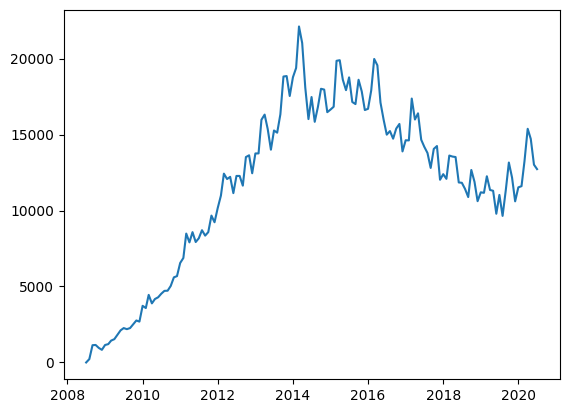

In [18]:
plt.plot(reshaped_df.index, reshaped_df.java) 

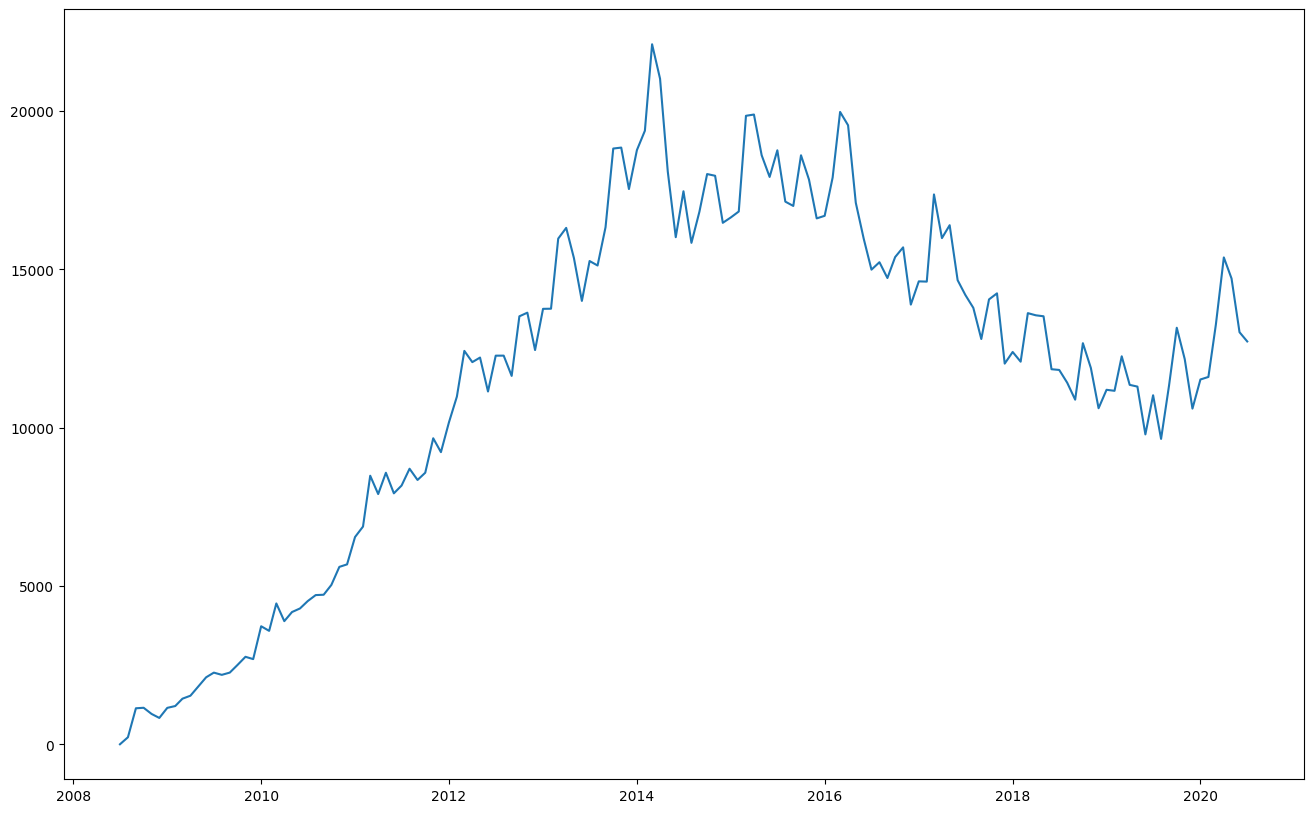

In [19]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

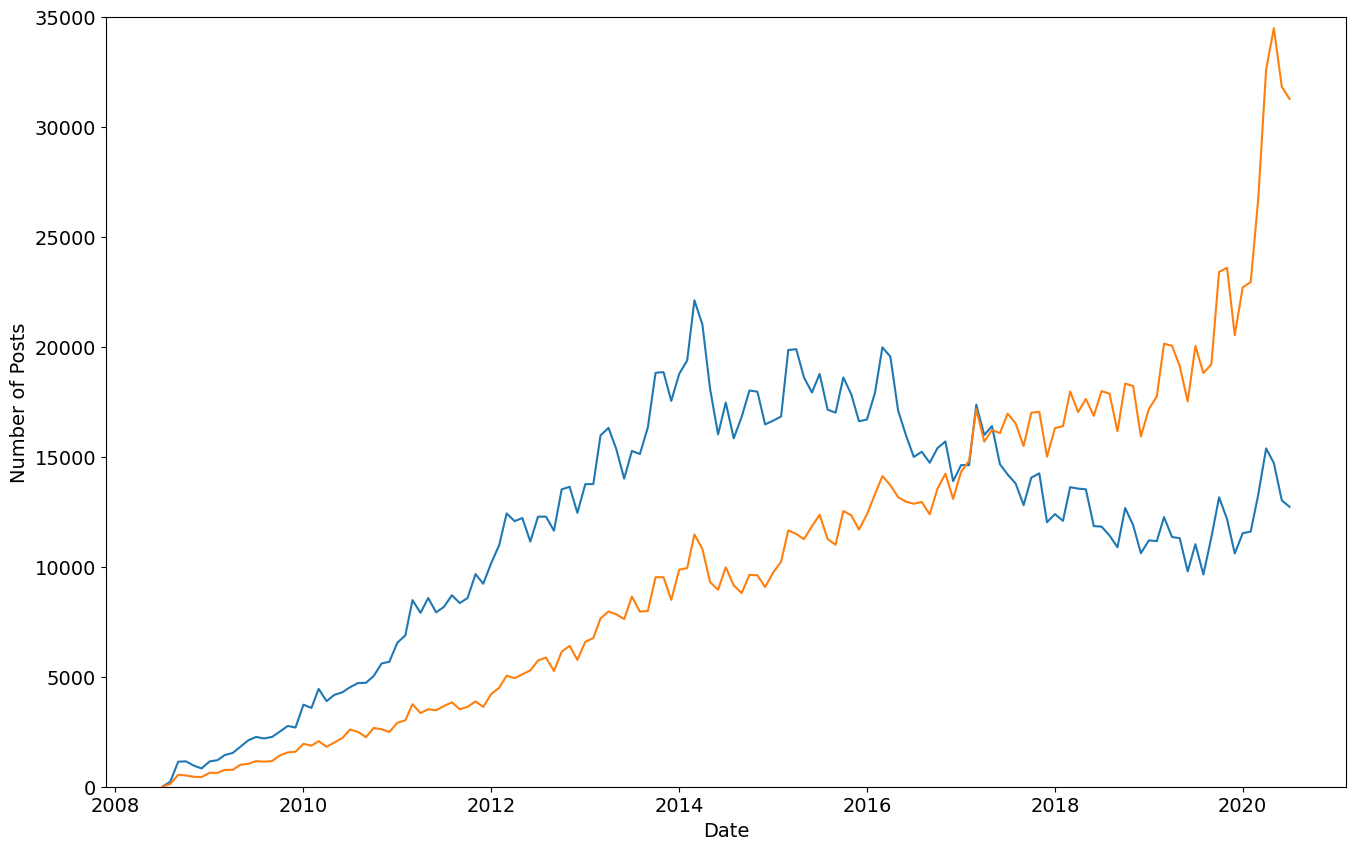

In [20]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

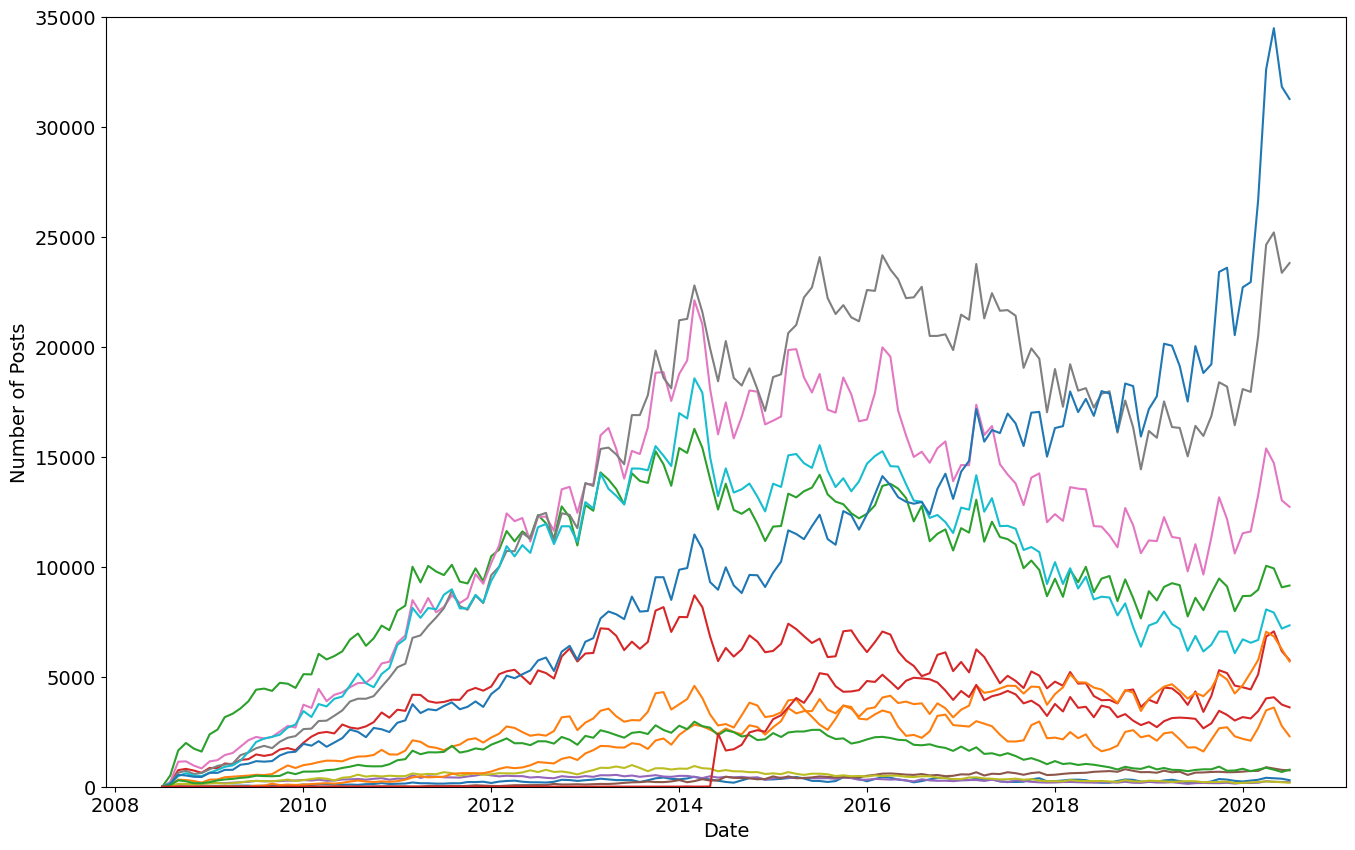

In [21]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

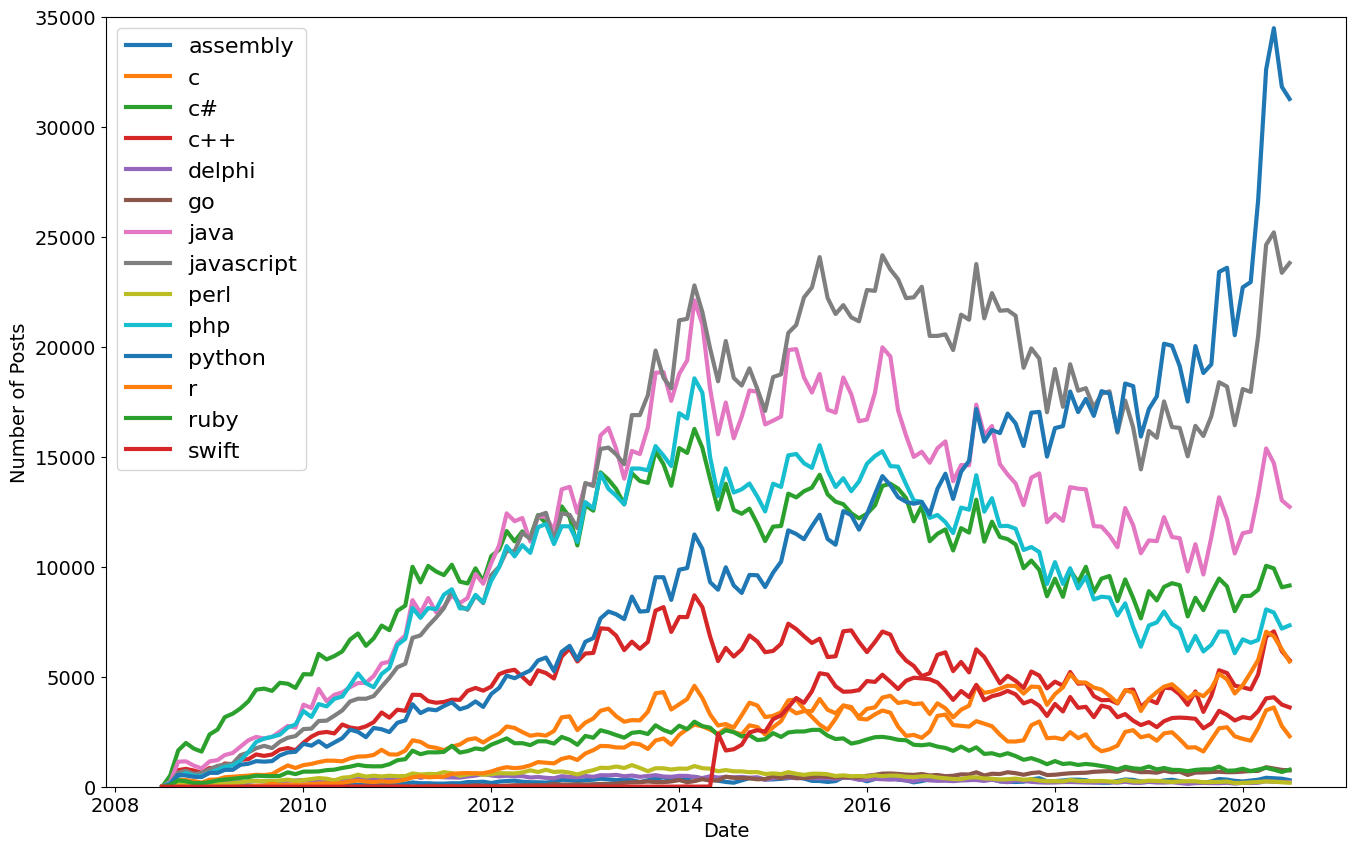

In [22]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

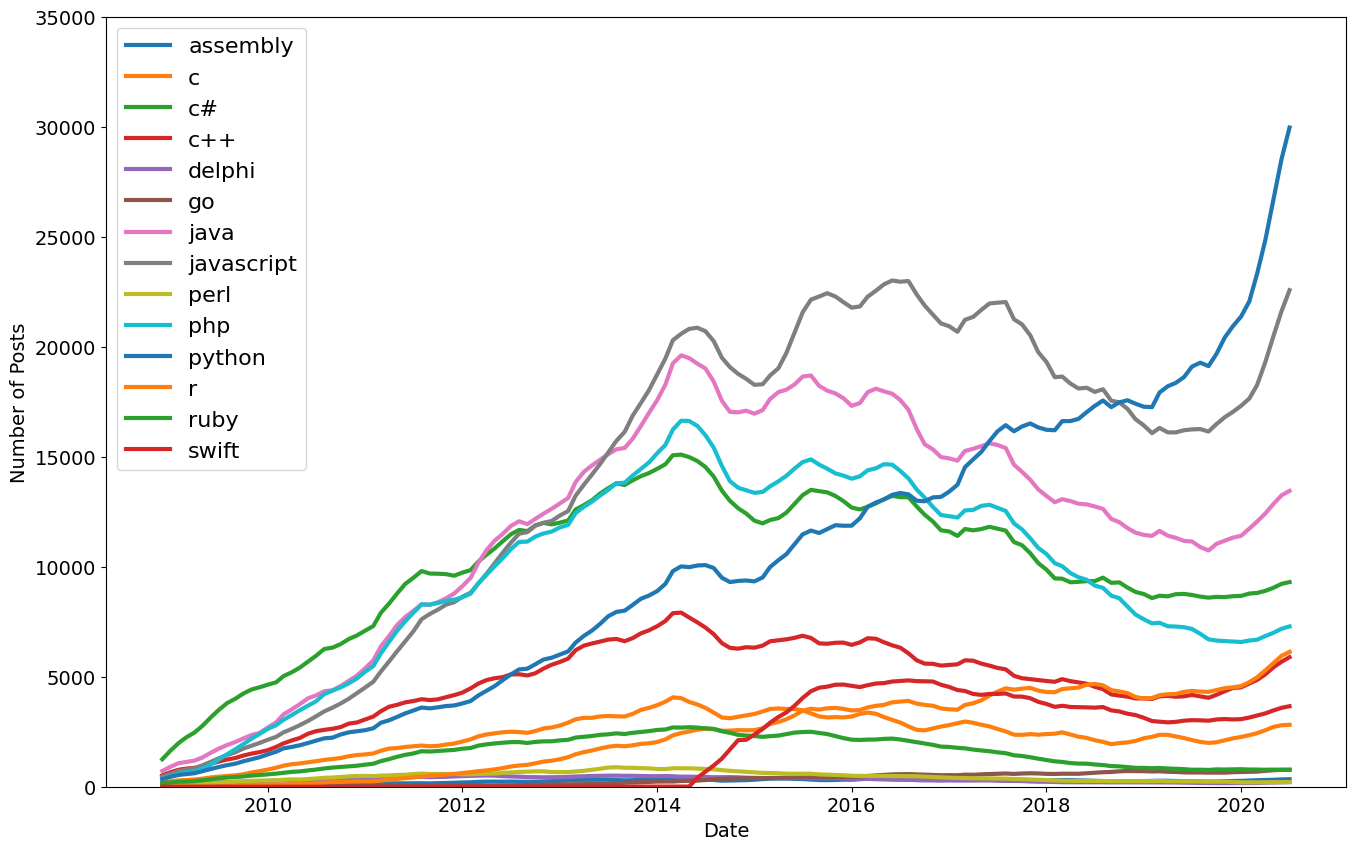

In [23]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)